# LMS Exploration | scikit-learn Breast Cancer Classifier
---

**[Introduce]**

- 유방암 여부 분류기


- 유방암분류기는 이미지로 유방암을 예측할 때 사용되는 각 특성값이 입력되었을 때, 유방암의 여부를 맞추는 분류모델이다


- Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression 의 다양한 모델로 학습시키고, 평가해본다.


**[dataset]**

- scikit-learn이 예제로 제공하는 Toy datasets 중 load_breast_cancer dataset 을 활용한다.


- load_breast_cancer의 data는 총 569개이고, feature은 30개의 breast cancer 예측을 위한 특성값이다.


- label은 유방암이 아닐 경우 'benign', 유방암일 경우 'malignant'의 두 가지 Class 로 분류되며 각각 0, 1 로 표현된다.  

## 1. 모듈 import

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd

## 2. 데이터 준비

In [2]:
breast_cancer = load_breast_cancer()
breast_cancer_data = breast_cancer.data

## 3. 데이터 이해하기

Feature Data 지정, Label Data 지정, Target Names 출력, 데이터 Describe 하기

In [3]:
print(breast_cancer.keys()) #- 객체가 가진 변수와 메서드 나열 출력
print(breast_cancer_data.shape) #- 배열의 형상정보 출력
breast_cancer_data[0] #- index가 0인 데이터 출력

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)


array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [4]:
breast_cancer.feature_names  

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

- breast_cancer의 data는 369개의 데이터가 각각 30개의 정보를 담고 있음.
- breast_cancer의 이미지 분석데이터로, 30개의 유방암예측 특성값을 나타냄.

In [5]:
breast_cancer_label = breast_cancer.target
print(breast_cancer_label.shape)
breast_cancer_label

(569,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

- target 데이터는 총 569개가 있고, 'benign'(유방암 음성)은 0, 'malignant'(유방암 양성)은 1의 label로 표현됨.

In [7]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
breast_cancer_df = pd.DataFrame(data=breast_cancer_data, columns=breast_cancer.feature_names)
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
breast_cancer_df["label"] = breast_cancer.target
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## 4. train, test 데이터 분리

In [10]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  455 , X_test 개수:  114


## 5. 다양한 모델로 학습시켜보기
Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression

### 5-1. Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

### 5-2. Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

### 5-3. SVM

In [13]:
from sklearn import svm
svm_model = svm.SVC(random_state=32)

svm_model.fit(X_train, y_train)

SVC(random_state=32)

### 5-4. SGD Classifier

In [14]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state=32)

sgd_model.fit(X_train, y_train)

SGDClassifier(random_state=32)

### 5-5. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=32, max_iter = 50000, solver='lbfgs')

logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=50000, random_state=32)

## 6. 모델 평가해보기
- 모델의 성능을 평가하는 지표로 무엇이 적절할까? 
- sklearn.metrics에서 제공하는 평가지표중 적절한 것은 선택하고, 선택한 이유를 설명하라

**[Machine Learning Model]**
* **Decision Tree (DTs)** 는 일련의 분류 규칙을 통해 데이터를 분류, 회귀하는 지도학습 모델 중 하나로, 결과 모델이 Tree 구조를 가지고 있다. 결정트리는 특정 기준에 따라 데이터를 구분하여 한번의 분기 때마다 변수 영역을 두 개로 구분하는데, 이때 결정트리는 불순도를 최소화하는 방향으로 학습을 진행한다.
* **Random Forest** 는 분류, 회귀분석 등에 사용되는 앙상블 학습 방법의 일종으로, 훈련 과정에서 구성한 다수의 결정 트리로부터 부류(분류) 또는 평균 예측치(회귀 분석)을 출력함으로써 동작한다. 랜덤 포레스트는 랜덤성에 의해 트리들이 서로 조금씩 다른 특성을 갖으며, 결과적으로 일반화 성능을 향상시킨다. 
* **Support Vector Machine (SVM)** 은 Non-linear problem 을 Linear problem 으로 바꾸어, 분류와 회귀분석에 사용되는 지도학습 모델이다. SVM 의 주요 목적은 두 클래스 사이의 Margin을 최대화하는 최적의 분리경계 'Hyperplane(초평면)'을 찾는 것이다. 
* **Stochastic Gradient Descent(SGD)** 는 Batch(단일 반복에서 기울기를 계산하는 데 사용하는 data의 총 개수)의 크기가 1 인 경사하강법 알고리즘이다. Mini-Batch를 사용하여 다소 부정확할 수는 있지만, BGD(Batch Gradient Descent)에 비해서 계산속도가 훨씬 빠르다. 
* **Logistic Regression** 는 회귀를 사용하여 데이터가 어떤 범수에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 '분류'해주는 지도학습 알고리즘이다. 로지스틱 회귀는 데이터가 어떤 범주에 속할 확률을 0과 1사이의 값으로 예측하는 이진분류가 기본이고, OvR 같은 방식을 사용하면 멀티 클래스 분류도 가능하다.

### 6-1. Classification Report

In [16]:
#- Decision Tree

y_pred_DT = decision_tree.predict(X_test)
accuracy_DT = accuracy_score(y_test, y_pred_DT)

print(f'\n[Decision Tree Classifier]\n')
print(classification_report(y_test, y_pred_DT))

#- Random Forest

y_pred_RF = random_forest.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred_RF)

print('\n[Random Forest Classifier]\n')
print(classification_report(y_test, y_pred_RF))

#- SVM

y_pred_SVM = svm_model.predict(X_test)
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)

print('\n[SVM Classifier]\n')
print(classification_report(y_test, y_pred_SVM))

#- SGD

y_pred_SGD = sgd_model.predict(X_test)
accuracy_SGD = accuracy_score(y_test, y_pred_SGD)

print('\n[SGD Classifier]\n')
print(classification_report(y_test, y_pred_SGD))

#- Logistic Regression

y_pred_LR = logistic_model.predict(X_test)
accuracy_LR = accuracy_score(y_test, y_pred_LR)

print('\n[Logistic Regression Classifier]\n')
print(classification_report(y_test, y_pred_LR))


[Decision Tree Classifier]

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114


[Random Forest Classifier]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114


[SVM Classifier]

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       1

### 6-2. Visualize Confusion Matrix 

* 아래의 Confusion Matrix 표에서 malignant는 양성, benign은 음성을 의미한다.
* x 축은 모델이 예측한 label을, y 축은 실제 정답 label을 나타낸다. 
* Normalized Confusion Matrix 로서 왼쪽 위부터 시계방향으로 전체 예측에서 TP, FN, FN, FP 각각의 비율을 보여준다.

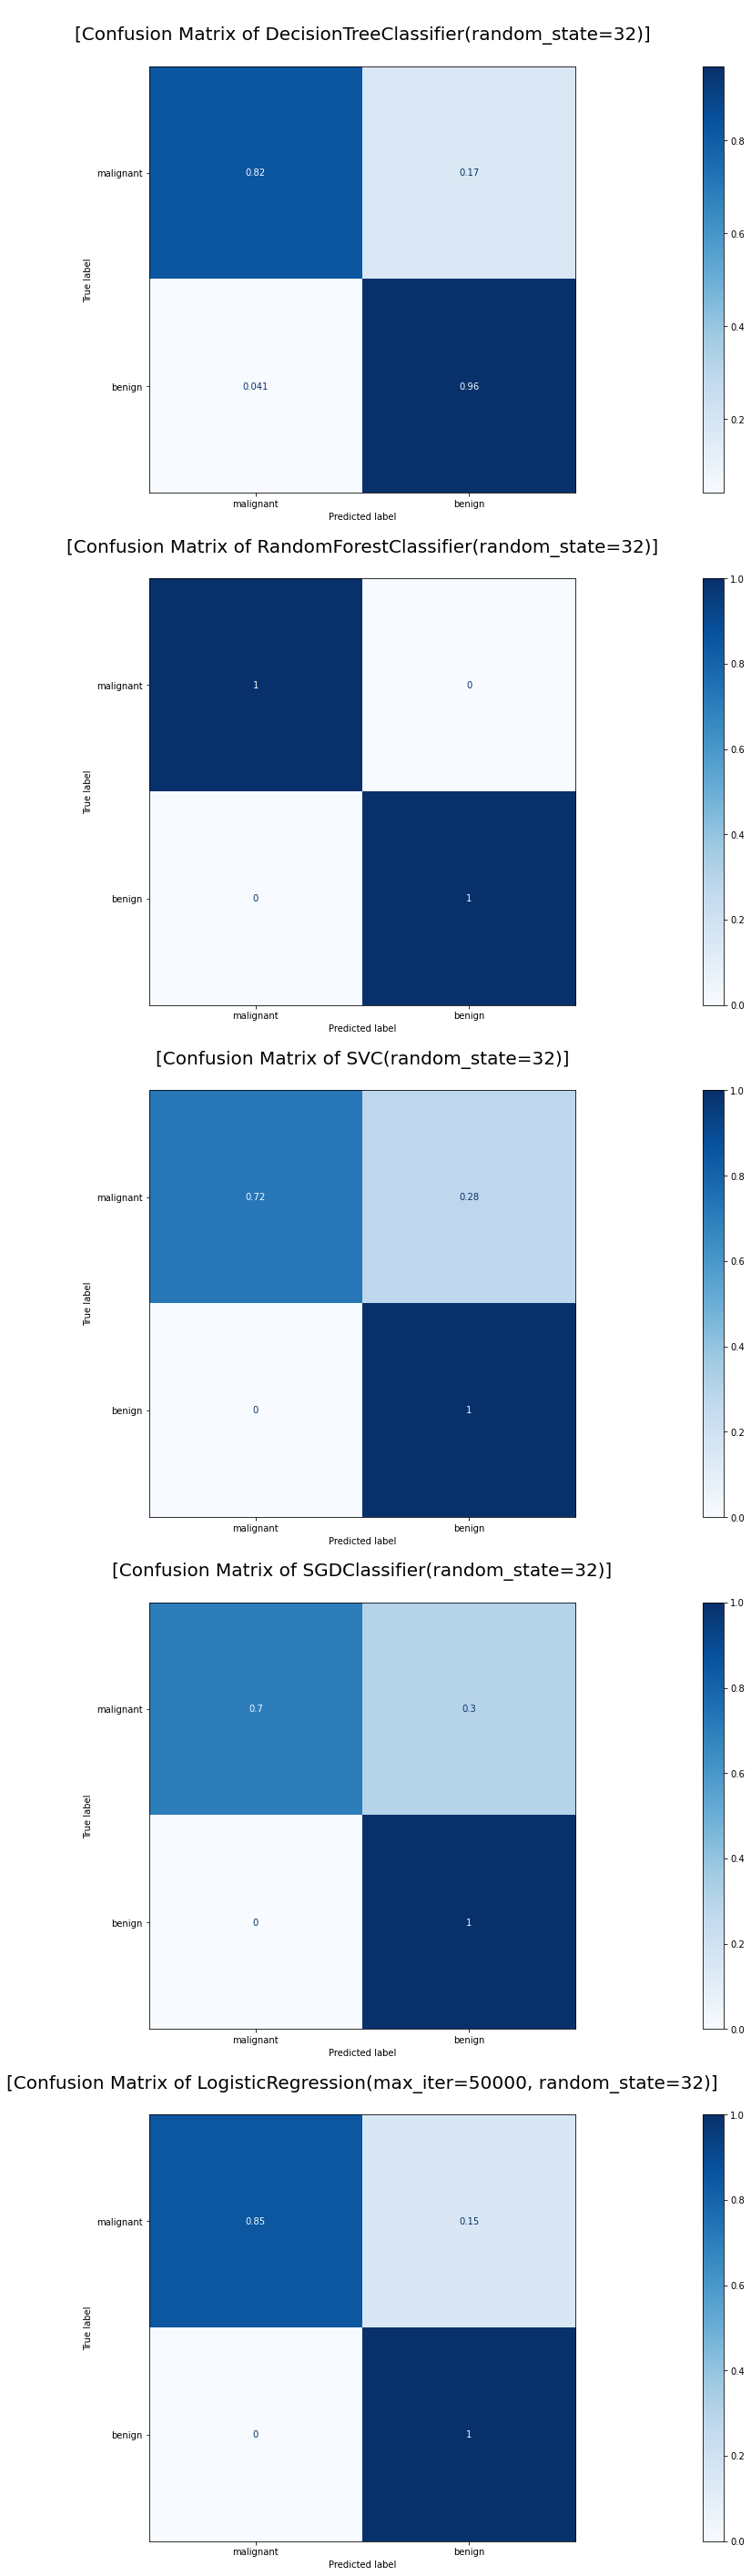

In [17]:
#- Confusion Matrix 시각화 함수
from sklearn.metrics import plot_confusion_matrix

def Visualize_Confusion_Matrix(model, X_test, y_test, label):
    #fig, ax = plt.subplots(figsize=(50, 50))
    plot = plot_confusion_matrix(model, X_test, y_test, display_labels=label, cmap=plt.cm.Blues, normalize='true', ax=ax)
    plot.ax_.set_title(f'\n[Confusion Matrix of {model}]\n', fontsize=20) 
    
model = [decision_tree, random_forest, svm_model, sgd_model, logistic_model]

fig = plt.figure(figsize=(50,50))
    
for i,j in enumerate(model):
    ax = fig.add_subplot(len(model),1,i+1)
    Visualize_Confusion_Matrix(j, X_test, y_test, breast_cancer.target_names )

### 6-3 Precision-Recall curve

* Precision은 모델이 positive라고 예측한 것 중에서 실제로 positive한 비율을 뜻한다.분자에는 TP(True Positive)가 오고 분모에는 TP와 FP(False Positive)가 온다. 즉 Precision은 알고리즘을 통해서 Positive라고 예측한 것들 중에서 정답을 얼마나 잘 맞추었는지의 비율을 의미한다. 
* Recall은 분자에 TP가 오고 분모에는 TP와 FN(False Negative)가 온다. TP와 FN의 합집합은 결국 실제 Positive의 전체 집합을 의미한다. 즉 Recall은 본래 내가 가진 실제 Positive 중에서 얼마나 알고리즘이 실제 Positive를 잘 예측했는지의 비율을 의미한다. 
* PrecisionR-Recall Curves는 Parameter인 Threshold를 변화시키면서 Precision과 Recall을 Plot한 Curve이다. x축은 Recall이 되고,y축은 Precision이 된다. 

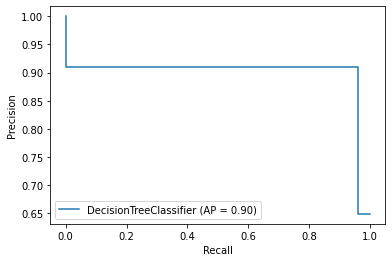

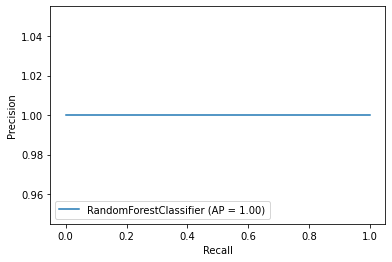

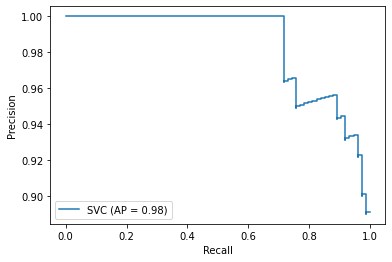

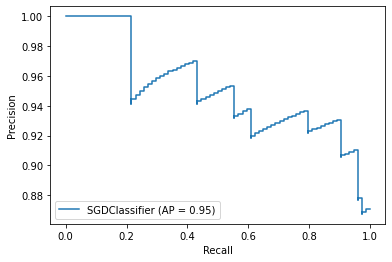

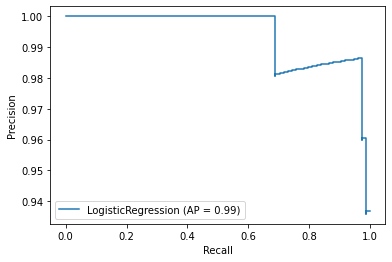

In [18]:
for classifier in model:
    disp = plot_precision_recall_curve(classifier, X_test, y_test) 

### 6-3. Compare Accuracy
각 모델의 test accuracy를 비교하여 가장 성능이 좋은 모델을 선정한다.

In [19]:
import operator

dict = {'Decision Tree':accuracy_DT, 'Random Forest':accuracy_RF, 'SVM':accuracy_SVM, 'SGD Classifier':accuracy_SGD, 'Logistic Regression':accuracy_LR}
sdict = sorted(dict.items(), key=operator.itemgetter(1), reverse=True)

print('\n[정확도가 높은 모델 순서]\n')
for i in range(len(sdict)):
    print(f'{i+1}.{sdict[i][0]}, 정확도 : {sdict[i][1]} ')
    
print(f'\n\n가장 정확도가 높은 모델은 {sdict[0][0]}이고, 정확도는 {sdict[0][1]}이며, \n가장 정확도가 낮은 모델은 {sdict[len(sdict)-1][0]}이고, 정확도는 {sdict[len(sdict)-1][1]}입니다\n')


[정확도가 높은 모델 순서]

1.Random Forest, 정확도 : 1.0 
2.Logistic Regression, 정확도 : 0.9473684210526315 
3.Decision Tree, 정확도 : 0.9122807017543859 
4.SVM, 정확도 : 0.9035087719298246 
5.SGD Classifier, 정확도 : 0.8947368421052632 


가장 정확도가 높은 모델은 Random Forest이고, 정확도는 1.0이며, 
가장 정확도가 낮은 모델은 SGD Classifier이고, 정확도는 0.8947368421052632입니다



## 7. 프로젝트 정리 | Summary

---

### 7-1. 성능평가

**Best Machine Learning Model** : Random Forest

**test_accuracy** : 1.0
**weighted average recall** : 1.0

유방암 예측의 경우, 건강한 사람에게 양성 판정을 하는 것은 괜찮지만(FP, False Positive), 실제 환자에게 음성 판정을 하는 것은 크게 위험하다(FN, False Negative). 때문에 최적의 Breast Cancer Classifier 모델 선정 시, Recall 값이 중요하다. FN의 값이 작아야 Recall 값이 높아지기 때문이다.

Random Forest의 경우 Recall 뿐만 아니라 모든 성능평가 지표에서 완벽한 결과를 보인다. 모든 Test 문제를 정확히 예측한 것이다. Recall 값과 Accuracy를 주로 고려했을 때, Random Forest 다음으로는 Logistic Regression, Decision Tree, SVC, SGD 순으로 성능이 좋다. 

Normalized Confusion Matrix에서 SVC, SGD의 FN 비율은 각각 0.28, 0.3 으로 높은 비율을 차지하기 때문에, recall 값이 중요한 유방암 예측모델에는 적합하지 않다고 판단했다. 

결과적으로, 5가지의 모델 중에서 Random Forest가 가장 유방암 예측 분류기에 적합하다.


### 7-2. 자기평가

머신러닝에 있어서 가장 쉬운 것이 '학습'이고 '데이터 전처리'와 '성능평가'가 어렵고 중요한 부분이라는 생각이 들었다. scikit-learn 에서 제공하는 양질의 데이터를 사용했기 때문에 데이터 전처리의 수고는 아낄 수 있었지만, dataset에 대해 모델의 평가지표를 선택하는 것이 어려웠다. 모델의 평가지표를 선택함에 있어서 '정확도의 함수'에 빠지지 않기 위해서는, dataset의 전반적인 특성을 고려하여 precision, recall 등의 다양한 평가지표를 고려해야 한다는 것을 배웠다. 앞으로 다양한 모델에 대한 이해가 뒷받침 된다면 성능평가의 지표를 선택하는 것도 한결 수월해질 것이라 기대한다.  